In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mglearn
import graphviz
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
df = pd.read_csv("Ecolicounts.csv")
df.head()

,PId,Village/Farm/Marketno,Studysite,Status,Sampletype,Sample1or2,Season,Uniqueid,TBXcount,StatusTBX,...,NDM1,pH,Conductivity,Temp,GISND,GISNM,GISED,GISEM,GISlat,GISlong
0,TR001,1,Rural household,High exposure,Compound soil,1,Winter,11211TR001,0,Negative,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TR001,1,Rural household,High exposure,Drinking water,1,Winter,11311TR001,0,Negative,...,0.00,7.4,173.0,25.4,NaN,NaN,NaN,NaN,NaN,NaN
2,TR001,1,Rural household,High exposure,Waste water,1,Winter,11411TR001,220000,Positive,...,174999.38,7.7,202.0,22.7,NaN,NaN,NaN,NaN,NaN,NaN
3,TR001,1,Rural household,High exposure,Downstream river water,1,Winter,11611TR001,217,Positive,...,0.00,7.6,262.0,22.7,24.0,5.384,90.0,6.273,24.08973,90.10455
4,TR001,1,Rural household,High exposure,Poultry pens,1,Winter,11811TR001,22000000,Positive,...,101832.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#sample types
#array(['Compound soil', 'Drinking water', 'Waste water',
       #'Downstream river water', 'Poultry pens', 'Poultry caecal sample',
      # 'Human faeces', 'Poultry caecal sample-2', 'Downstream pond water',
      # 'Animal manure', 'Human faeces-2', 'Poultry drinking water',
      # 'Human faeces-3', 'Pond sediment', 'River sediment',
       #'Poultry Poultry caecal sample-2', 'Poultry Poultry caecal sample',
      # 'Solid waste', 'Waste water-2', 'Solid waste-2', 'Poultry pens-2'],
     # dtype=object)

In [27]:
#subset non water samples to deal with NAs

non_water_data = df[~df['Sampletype'].isin(['Downstream river water',
                                       'Downstream pond water', 
                                       'Poultry drinking water', 
                                       'Waste water', 
                                       'Waste water-2',
                                           'Drinking water'])].copy()

non_water_data.head()

,PId,Village/Farm/Marketno,Studysite,Status,Sampletype,Sample1or2,Season,Uniqueid,TBXcount,StatusTBX,...,NDM1,pH,Conductivity,Temp,GISND,GISNM,GISED,GISEM,GISlat,GISlong
0,TR001,1,Rural household,High exposure,Compound soil,1,Winter,11211TR001,0,Negative,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TR001,1,Rural household,High exposure,Poultry pens,1,Winter,11811TR001,22000000,Positive,...,101832.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TR001,1,Rural household,High exposure,Poultry caecal sample,1,Winter,11911TR001,22000000,Positive,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TR001,1,Rural household,High exposure,Human faeces,1,Winter,111011TR001,3600000,Positive,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TR001,1,Rural household,High exposure,Poultry caecal sample-2,2,Winter,111911TR001,22000000,Positive,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#drop unnecessary columns
non_water_data = non_water_data.drop(['PId', 'Village/Farm/Marketno',
       'Sample1or2','Uniqueid', 'TBXcount', 'StatusTBX',
       'ESBLcount','KPCcount','GISND', 'GISNM', 'GISED', 'GISEM', 'GISlat',
       'GISlong', 'pH', 'Conductivity', 'Temp'], axis = 1)
non_water_data.columns

Index(['Studysite', 'Status', 'Sampletype', 'Season', 'StatusESBL', 'StatusK',
       'CTXM', 'NDM1'],
      dtype='object')

In [31]:
#look at where the remaining NAs are
non_water_data.isna().sum()
#no NA's remanining

Studysite     0
Status        0
Sampletype    0
Season        0
StatusESBL    0
StatusK       0
CTXM          0
NDM1          0
dtype: int64

In [33]:
#get dummies for categorical variables
non_water_data = pd.get_dummies(non_water_data, columns=['Studysite', 'Status', 'Sampletype', 'Season', 'StatusESBL', 'StatusK', ])

non_water_data.head()

,CTXM,NDM1,Studysite_Live bird market,Studysite_Poultry farm,Studysite_Rural household,Status_High exposure,Status_Low exposure,Sampletype_Animal manure,Sampletype_Compound soil,Sampletype_Human faeces,...,Sampletype_Poultry pens-2,Sampletype_River sediment,Sampletype_Solid waste,Sampletype_Solid waste-2,Season_Summer,Season_Winter,StatusESBL_Negative,StatusESBL_Positive,StatusK_Negative,StatusK_Positive
0,0.00,0.00,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4,45929.34,101832.32,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
5,0.00,0.00,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
6,0.00,0.00,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
7,0.00,0.00,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [35]:
#drop out redundant dummy columns
non_water_data = non_water_data.drop(['Status_Low exposure', 'Season_Winter', 'StatusESBL_Negative', 'StatusK_Negative'], axis = 1)
non_water_data.columns

Index(['CTXM', 'NDM1', 'Studysite_Live bird market', 'Studysite_Poultry farm',
       'Studysite_Rural household', 'Status_High exposure',
       'Sampletype_Animal manure', 'Sampletype_Compound soil',
       'Sampletype_Human faeces', 'Sampletype_Human faeces-2',
       'Sampletype_Human faeces-3', 'Sampletype_Pond sediment',
       'Sampletype_Poultry Poultry caecal sample',
       'Sampletype_Poultry Poultry caecal sample-2',
       'Sampletype_Poultry caecal sample',
       'Sampletype_Poultry caecal sample-2', 'Sampletype_Poultry pens',
       'Sampletype_Poultry pens-2', 'Sampletype_River sediment',
       'Sampletype_Solid waste', 'Sampletype_Solid waste-2', 'Season_Summer',
       'StatusESBL_Positive', 'StatusK_Positive'],
      dtype='object')

In [37]:
#split data 80/20
X_train, X_test, y_train, y_test = train_test_split(non_water_data.drop('StatusESBL_Positive', axis = 1), non_water_data['StatusESBL_Positive'],
                                                    random_state=0)

#fit random forest classifier
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [39]:
#get accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.880
Accuracy on test set: 0.628


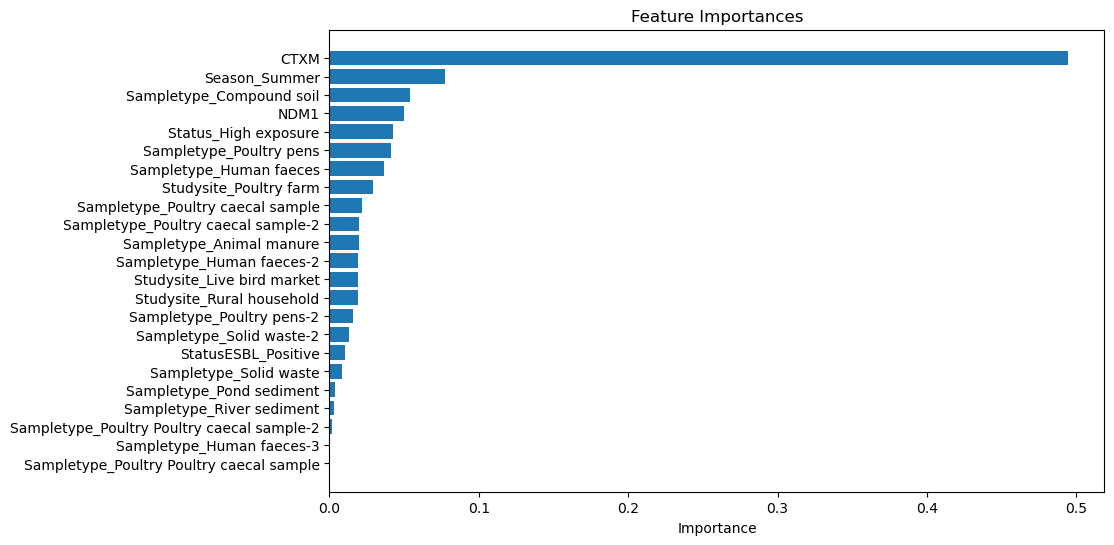

In [41]:
#plot feature importance graph
importances = forest.feature_importances_

feature_names = non_water_data.columns  

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [43]:
#do a grid search iterating over 5 values for n_estimators and max depth

#initialize parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#get best parameters and accuracy scores
print("Grid-Search with accuracy")
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid_search.best_score_))
print("Test set accuracy: {:.3f}".format(grid_search.score(X_test, y_test)))


Grid-Search with accuracy
Best parameters: {'max_depth': 5, 'n_estimators': 300}
Best cross-validation score (accuracy)): 0.741
Test set accuracy: 0.667


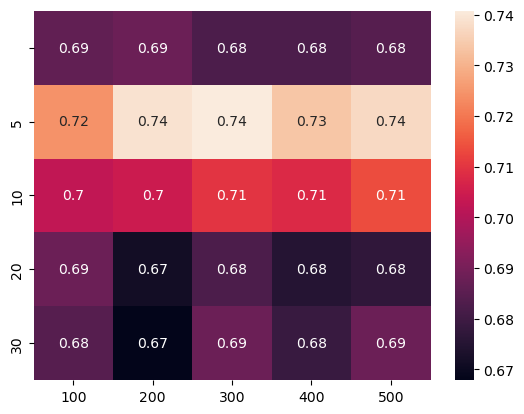

In [45]:
#make a heatmap of the grid search results
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results['mean_test_score']).reshape(5, 5)
sns.heatmap(scores, annot=True, xticklabels = param_grid['n_estimators'], yticklabels = param_grid['max_depth'])
plt.show()